In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

TRAINING IMAGE PREPROCESSING

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\krith\OneDrive\Desktop\Mini project\archive\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70243 files belonging to 38 classes.


VALIDATION IMAGE PREPROCESSING

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\krith\OneDrive\Desktop\Mini project\archive\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17557 files belonging to 38 classes.


BUILDING MODEL(CNN)

In [23]:
import os
checkpoint_path = "plant_disease_checkpoint.keras"
initial_epoch = 0

if os.path.exists(checkpoint_path):
    cnn = tf.keras.models.load_model(checkpoint_path)
    initial_epoch = int(cnn.optimizer.iterations.numpy() // len(training_set))
else:
    cnn = tf.keras.models.Sequential()
    cnn.add(tf.keras.layers.Input(shape=(128, 128, 3)))

    cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, padding='same', activation='relu'))
    cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

    cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding='same', activation='relu'))
    cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

    cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
    cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

    cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
    cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

    cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
    cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

    cnn.add(tf.keras.layers.Dropout(0.25))
    cnn.add(tf.keras.layers.Flatten())
    cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
    cnn.add(tf.keras.layers.Dropout(0.4))
    cnn.add(tf.keras.layers.Dense(units=38, activation='softmax'))

    cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_best_only=False,save_weights_only=False)
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10,initial_epoch=initial_epoch,callbacks=[checkpoint_cb])

Epoch 1/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1776s 808ms/step - accuracy: 0.3934 - loss: 2.1755 - val_accuracy: 0.8351 - val_loss: 0.5176
Epoch 2/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1769s 805ms/step - accuracy: 0.8313 - loss: 0.5256 - val_accuracy: 0.9070 - val_loss: 0.2868
Epoch 3/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1770s 806ms/step - accuracy: 0.9052 - loss: 0.2915 - val_accuracy: 0.9227 - val_loss: 0.2397
Epoch 4/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1759s 801ms/step - accuracy: 0.9341 - loss: 0.2005 - val_accuracy: 0.9403 - val_loss: 0.1851
Epoch 5/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1757s 800ms/step - accuracy: 0.9473 - loss: 0.1576 - val_accuracy: 0.9580 - val_loss: 0.1301
Epoch 6/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1757s 800ms/step - accuracy: 0.9625 - loss: 0.1189 - val_accuracy: 0.9402 - val_loss: 0.1950
Epoch 7/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1766s 804ms/step - accuracy: 0.9682 - loss: 0.0929 - val_accuracy: 0.9651 - val_loss: 0.1110
Epoch 8/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1764s 803ms/s

In [26]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2196/2196 ━━━━━━━━━━━━━━━━━━━━ 618s 281ms/step - accuracy: 0.9897 - loss: 0.0324
Training accuracy: 0.9904047250747681


In [27]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

549/549 ━━━━━━━━━━━━━━━━━━━━ 151s 275ms/step - accuracy: 0.9637 - loss: 0.1380
Validation accuracy: 0.9632055759429932


In [28]:
cnn.save('trained_plant_disease_model.keras')

In [29]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5978958606719971,
  0.8588328957557678,
  0.9155076146125793,
  0.941616952419281,
  0.9535470008850098,
  0.9658898115158081,
  0.9706020355224609,
  0.9757555723190308,
  0.9798271656036377,
  0.9816209673881531],
 'loss': [1.3743658065795898,
  0.4423365294933319,
  0.2608855366706848,
  0.17962537705898285,
  0.14015080034732819,
  0.1070878803730011,
  0.08720867335796356,
  0.07429125159978867,
  0.06454449892044067,
  0.05786798521876335],
 'val_accuracy': [0.8350515365600586,
  0.9070456027984619,
  0.9227088689804077,
  0.940308690071106,
  0.9579654932022095,
  0.9401947855949402,
  0.9651421308517456,
  0.9671356081962585,
  0.9712935090065002,
  0.9632055759429932],
 'val_loss': [0.5175834894180298,
  0.28680509328842163,
  0.23972971737384796,
  0.18514461815357208,
  0.13005879521369934,
  0.19503571093082428,
  0.11100126057863235,
  0.10616500675678253,
  0.09216942638158798,
  0.13243916630744934]}

In [30]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [31]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


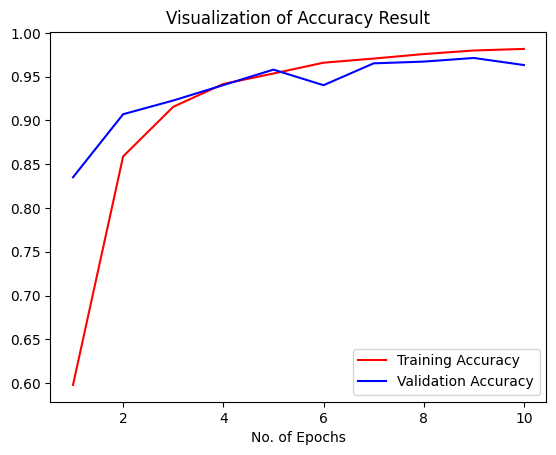

In [32]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [33]:
class_name = validation_set.class_names

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
     r"C:\Users\krith\OneDrive\Desktop\Mini project\archive\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17557 files belonging to 38 classes.


In [35]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17557/17557 ━━━━━━━━━━━━━━━━━━━━ 201s 11ms/step


In [36]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [37]:
Y_true

<tf.Tensor: shape=(17557,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [38]:
predicted_categories

<tf.Tensor: shape=(17557,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [40]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.90      0.97      0.93       504
                                 Apple___Black_rot       1.00      0.95      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.97      0.94      0.95       502
                               Blueberry___healthy       0.99      0.94      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.93      0.93       395
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.95      0.

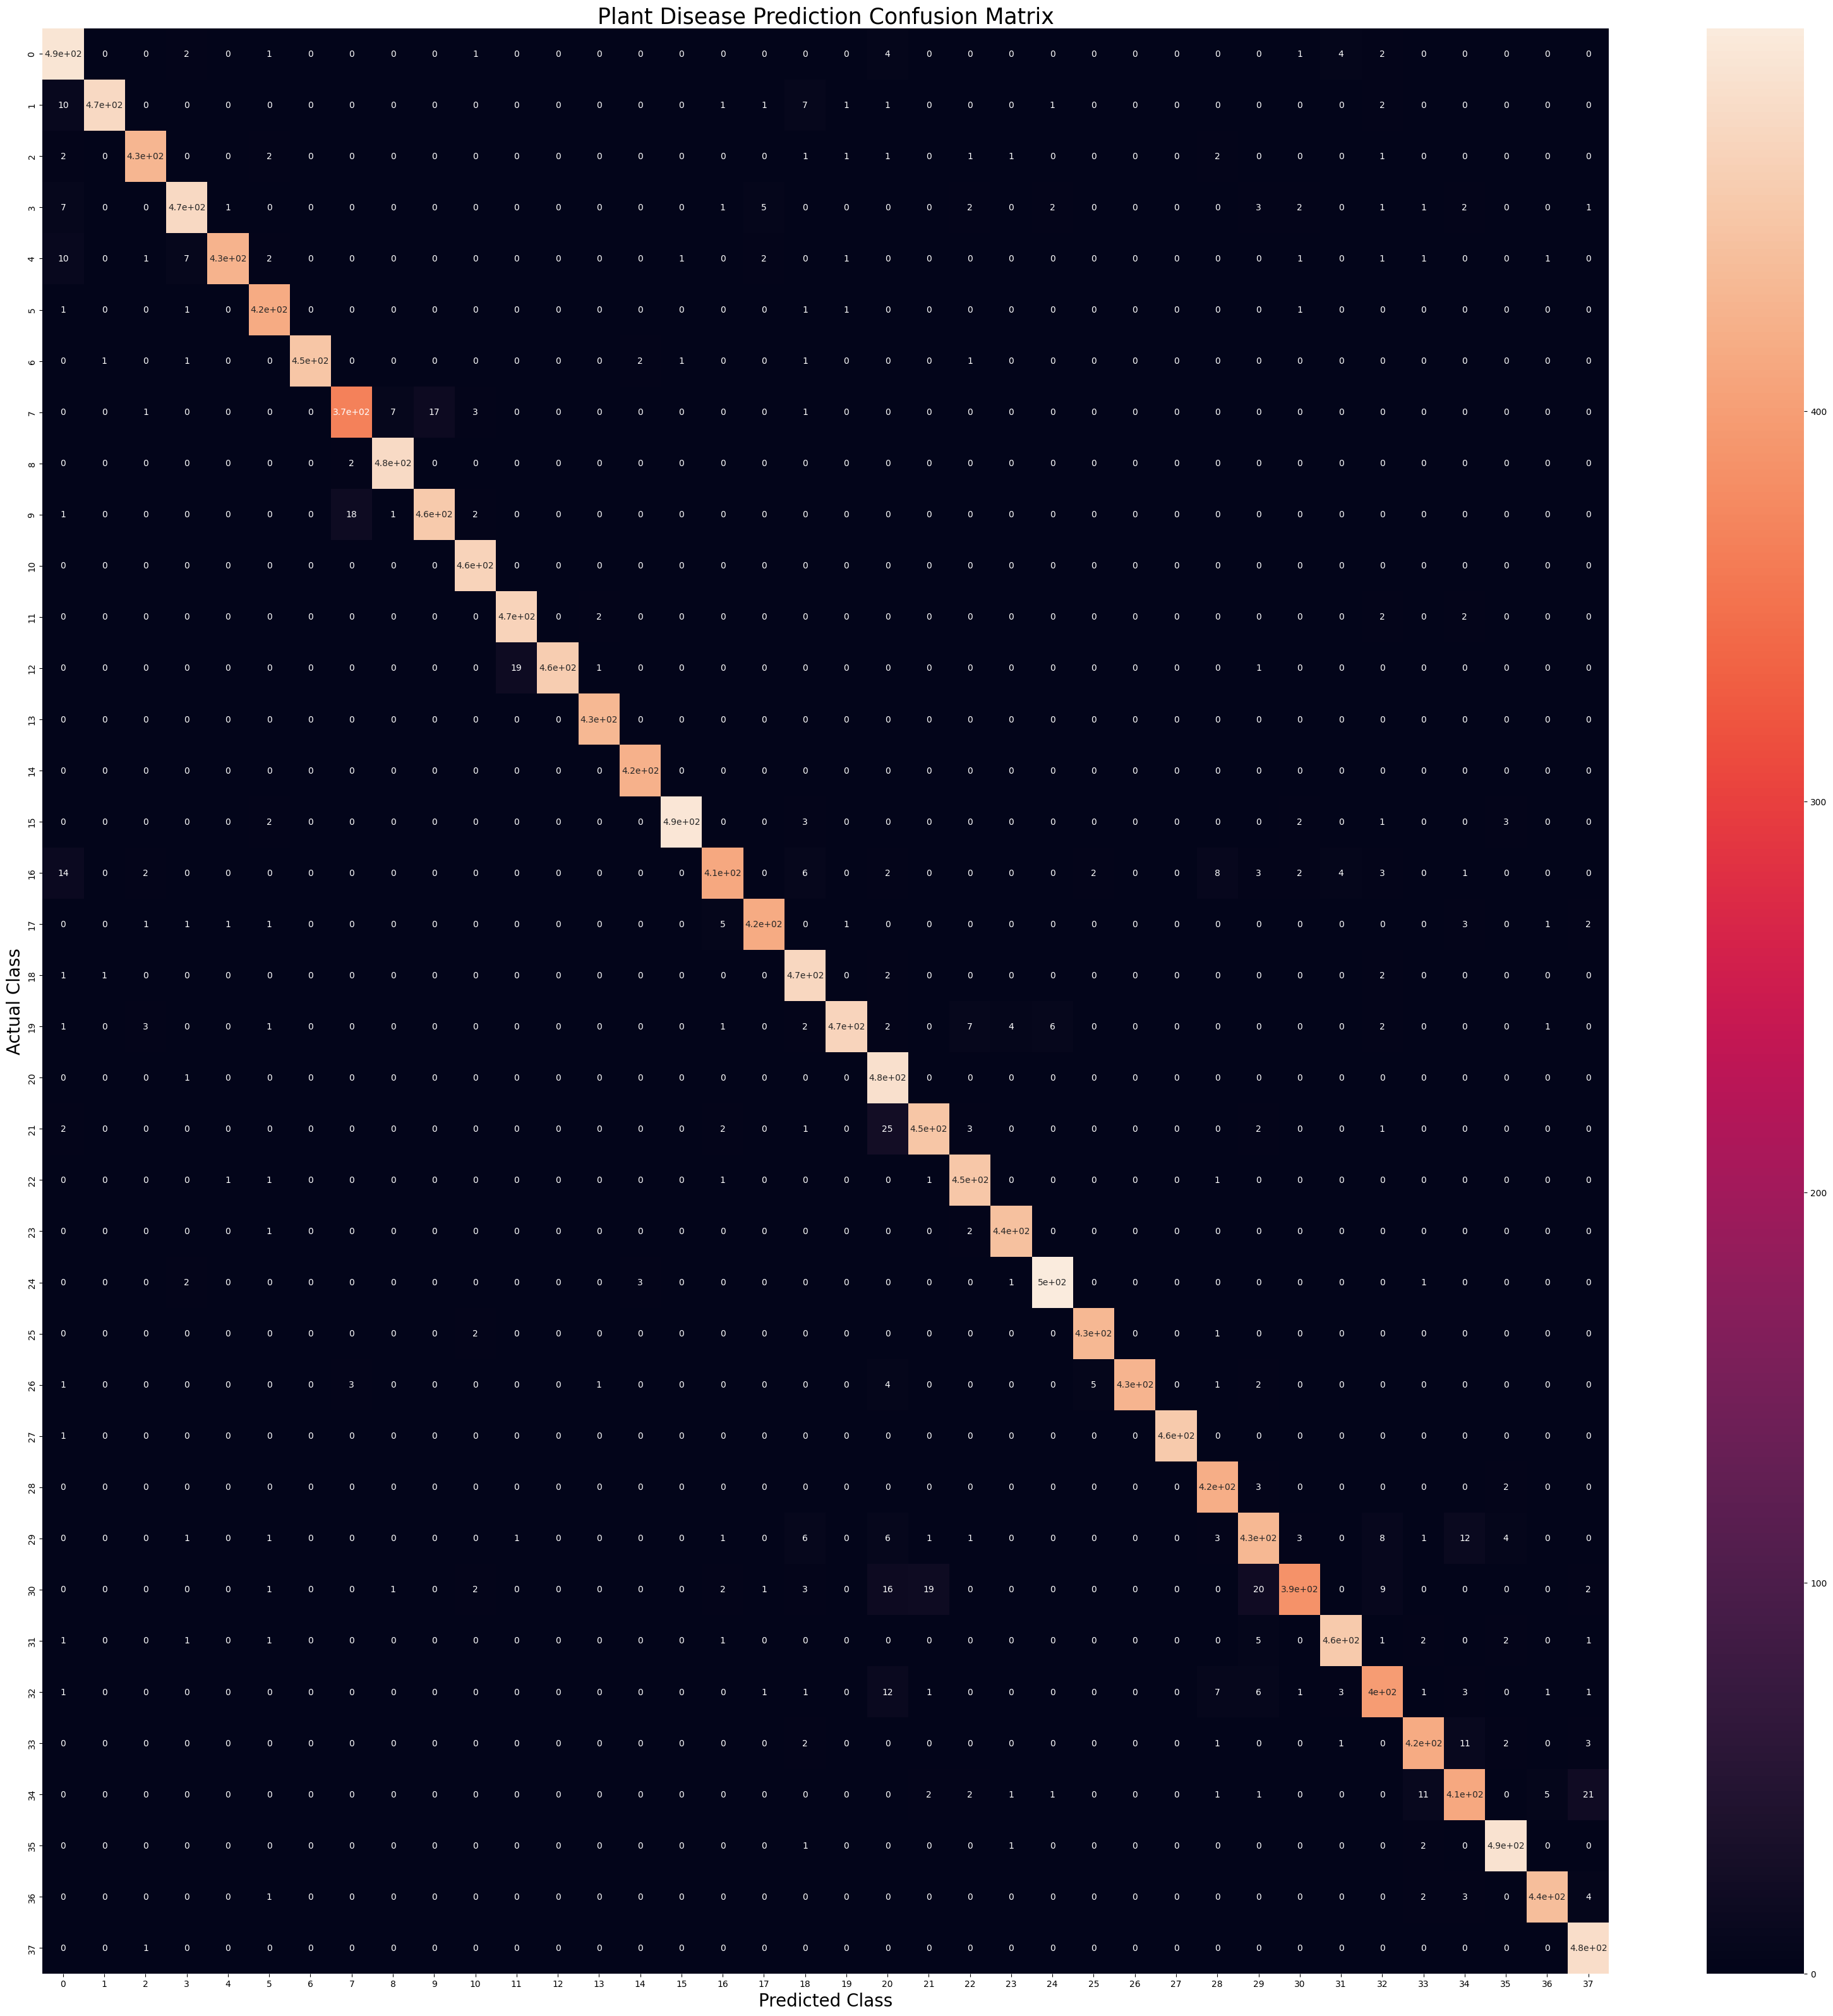

In [41]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()